## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle on Top Spotify Songs. No need to dowload it, it is already in the `exercises` directory.

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

In [1]:
# import all librarys and modules needed
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

spotify_df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

spotify_df.head(10)



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [4]:
# import and clean data
for col in spotify_df.columns:
    pct_missing = np.mean(spotify_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


track_name - 0%
artist(s)_name - 0%
artist_count - 0%
released_year - 0%
released_month - 0%
released_day - 0%
in_spotify_playlists - 0%
in_spotify_charts - 0%
streams - 0%
in_apple_playlists - 0%
in_apple_charts - 0%
in_deezer_playlists - 0%
in_deezer_charts - 0%
in_shazam_charts - 5%
bpm - 0%
key - 10%
mode - 0%
danceability_% - 0%
valence_% - 0%
energy_% - 0%
acousticness_% - 0%
instrumentalness_% - 0%
liveness_% - 0%
speechiness_% - 0%


In [9]:
duplicates = spotify_df.duplicated(subset='track_name')
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 953, dtype: bool


In [14]:
spotify_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [15]:
spotify_df.info


<bound method DataFrame.info of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mo

In [16]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [17]:
print(spotify_df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [3]:
spotify_clean = spotify_df.drop(['valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
print(spotify_clean)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [11]:
spotify_clean[spotify_clean.isnull().any(axis=1)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,215,745,58,"1,021",118,NaN,Major,71
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,198,863,46,NaN,174,F#,Minor,52
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,227,95,24,"1,173",78,NaN,Major,44
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,98,582,2,73,135,NaN,Minor,48
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,33,34,7,184,120,NaN,Major,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,After LIKE,IVE,1,2022,8,22,767,12,265548837,20,129,11,0,12,125,NaN,Major,68
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,244585109,102,53,113,12,0,137,NaN,Major,74
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,2020,12,18,668,1,140430339,0,0,31,0,NaN,125,D#,Minor,49
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,3,15,0,0,110,NaN,Major,48


In [14]:
spotify_clean2 = spotify_clean.dropna()

print(spotify_clean2)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

### Creating Visualizations

Now that the data is ready, you can use the dataset to create a number of different visualizations. You do not need to make the visualizations perfect; this is just for practice.

#### Line Chart

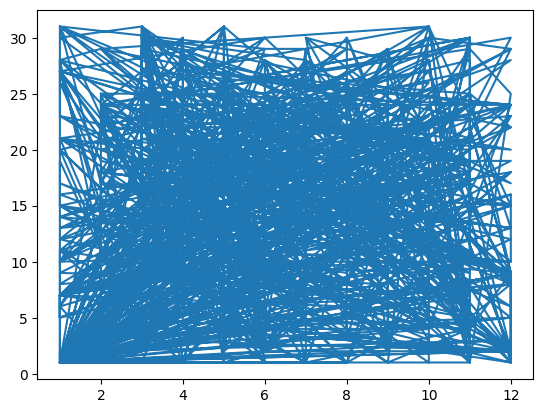

In [19]:
# Single line chart
plt.plot(spotify_clean['released_month'],spotify_clean['released_day'])
plt.show()

# my code returned rerros beause the shapes didn't match for the 2 axis, so I need to clean some more nulls out. 

# this is a mess and needs some kind of aggregate to clean it up. count by month and day would be helpful rather than trying to put all 800+ records onto this small viz

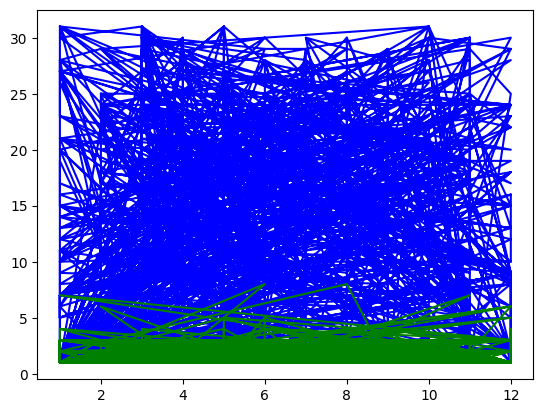

In [22]:
# Multiple Line chart 
plt.plot(spotify_clean['released_month'],spotify_clean['released_day'], color='blue')
plt.plot(spotify_clean['released_month'],spotify_clean['artist_count'], color='green')
plt.show()

# that chart made no sense with years and days on the Y because of the range of min and max in each column
# I swapped year for artist count

# It's still a terrible line chart because of the sheer number of datapoints


#### Bar Chart

<BarContainer object of 953 artists>

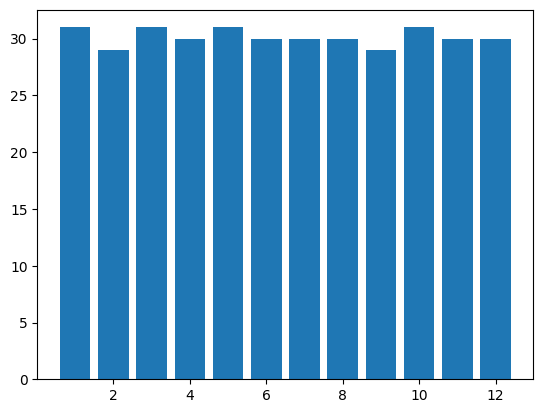

In [23]:
# Vertical bar chart
plt.bar(spotify_clean['released_month'],spotify_clean['released_day'])


<BarContainer object of 953 artists>

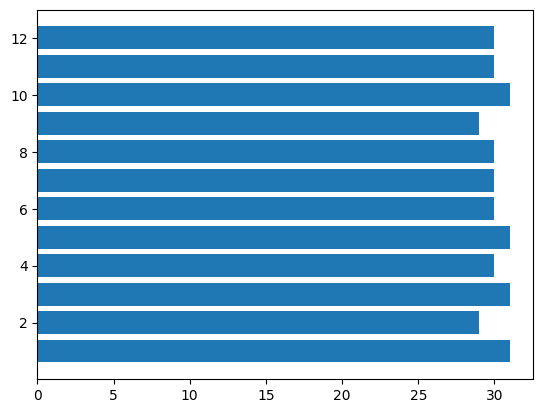

In [24]:
# Horizontal bar chart
plt.barh(spotify_clean['released_month'],spotify_clean['released_day'])

<function matplotlib.pyplot.show(close=None, block=None)>

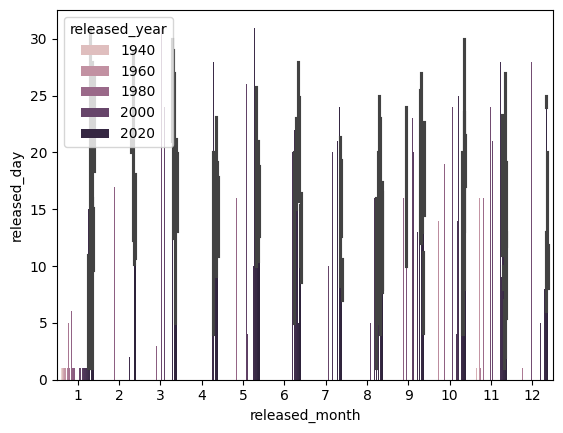

In [28]:
# Grouped bar chart
sb.barplot(data=spotify_clean2, x='released_month', y='released_day', hue='released_year', orient="v")
plt.show


#### Scatter Plot

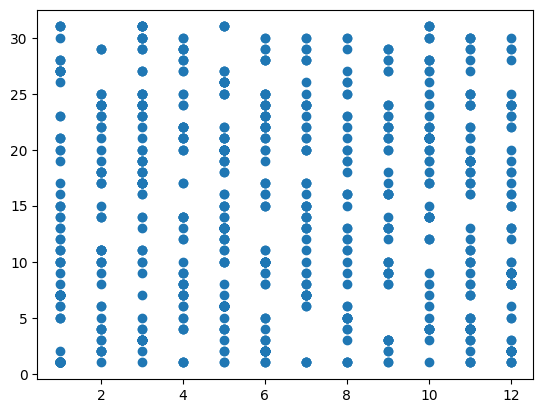

In [20]:
# scatter plot
plt.scatter(spotify_clean['released_month'],spotify_clean['released_day'])
plt.show()



#### Histogram

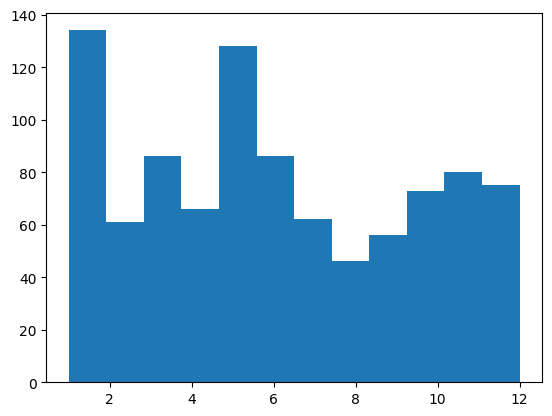

In [29]:
# histogram
plt.hist(spotify_clean['released_month'], bins=12)
plt.show()

#### Pie Chart

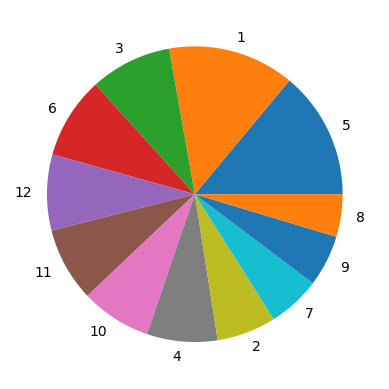

In [41]:
# pie chart

month_counts = spotify_clean2['released_month'].value_counts()
plt.pie(month_counts, labels=month_counts.index)

plt.show()
